In [11]:
import kwant

import tinyarray
import numpy as np
# import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.sparse.linalg as sla
import scipy.sparse.linalg
import scipy.linalg

In [58]:
g_e = 22.7
g_h = -1.21

sigma_0 = tinyarray.array([[1,0],[0,1]])
sigma_x = tinyarray.array([[0,1],[1,0]])
sigma_y = tinyarray.array([[0,-1j],[1j,0]])
sigma_z = tinyarray.array([[1,0],[0,-1]])
sigma_g = tinyarray.array([[22.7,0],[0,-1.21]])

array([[22.7, 0.0],
       [0.0, -1.21]])

In [68]:
a = 1.0
W = 200
L = 500
hamiltonian = """
      + C * identity(4) + M * kron(sigma_0, sigma_z)
      - B * ((k_x - y * B_0/25)**2 + k_y**2) * kron(sigma_0, sigma_z)
      - D * ((k_x - y * B_0/25)**2 + k_y**2) * kron(sigma_0, sigma_0)
      + A * (k_x - y * B_0/25) * kron(sigma_z, sigma_x)
      - A * k_y * kron(sigma_0, sigma_y)
      + mu_B * B_0/2 * kron(sigma_z, Matrix([[22.7,0],[0,-1.21]]))
   """

params = dict(A=364.5, B=-686.0, D=-512.0, M=-10.0, C=0, mu_B = 58.0, B_0 = 0.01 )

template_syst = kwant.continuum.discretize(hamiltonian, grid_spacing = a)
# print(template_syst)

def shape(site):
        (x, y) = site.pos
        return (-W/2 <= y < W/2 and -L/2 <= x < L/2)
    
def lead_shape(site):
        (x, y) = site.pos
        return (-W/2 <= y < W/2)
    
syst = kwant.Builder()
syst.fill(template_syst, shape, (0, 0))

lead = kwant.Builder(kwant.TranslationalSymmetry([-a, 0]))
lead.fill(template_syst, lead_shape, (0, 0))

syst.attach_lead(lead)
syst.attach_lead(lead.reversed())
    
syst = syst.finalized()
# syst = kwant.wraparound.wraparound(syst,coordinate_names='x').finalized()

# Discrete coordinates: x y

# Onsite element:
_cache_0 = (
array([[-0.0016+0.j,  0.    +0.j,  0.    +0.j,  0.    +0.j],
       [ 0.    +0.j,  0.0016+0.j,  0.    +0.j,  0.    +0.j],
       [ 0.    +0.j,  0.    +0.j, -0.0016+0.j,  0.    +0.j],
       [ 0.    +0.j,  0.    +0.j,  0.    +0.j,  0.0016+0.j]]))
_cache_1 = (
array([[-4.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  4.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j, -4.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  4.+0.j]]))
_cache_2 = (
array([[-0.0016+0.j,  0.    +0.j,  0.    +0.j,  0.    +0.j],
       [ 0.    +0.j, -0.0016+0.j,  0.    +0.j,  0.    +0.j],
       [ 0.    +0.j,  0.    +0.j, -0.0016+0.j,  0.    +0.j],
       [ 0.    +0.j,  0.    +0.j,  0.    +0.j, -0.0016+0.j]]))
_cache_3 = (
array([[ 11.35 +0.j,   0.   +0.j,   0.   +0.j,   0.   +0.j],
       [  0.   +0.j,   0.605+0.j,   0.   +0.j,   0.   +0.j],
       [  0.   +0.j,   0.   +0.j, -11.35 +0.j,   0.   +0.j],
       [  0.   +0.j,   0.   +0.j,   0.   +0.

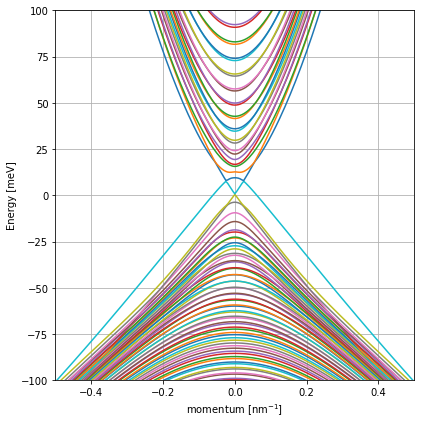

In [67]:
kx_max = 0.5
kx_min = -kx_max

kwant.plotter.bands(syst.leads[0], params=params,
                   momenta=np.linspace(kx_min, kx_max, 201),
                   fig_size=(6,6), show=False)

plt.grid()
plt.xlim(kx_min, kx_max)
plt.ylim(-100, 100)
plt.xlabel(r'momentum [nm$^{-1}$]')
plt.ylabel(r'Energy [meV]')
plt.tight_layout()
plt.show()

In [32]:
# def h_k(k_x):
#     p = dict(k_x=k_x,k_y=0, **params)
#     return syst.hamiltonian_submatrix(params=p)

# k_tb = np.linspace(-np.pi/a, np.pi/a, 201)*0.10
# e_tb = [scipy.linalg.eigvalsh(h_k(k_x=a*ki)) for ki in k_tb]
# plt.xlim(-0.5,0.5)
# plt.ylim(-100,100)
# plt.plot(k_tb, e_tb, 'k-')
# plt.show()

MemoryError: 

In [8]:
# h_kx = kwant.continuum.lambdify(hamiltonian, locals=params)

# template_lead = kwant.continuum.discretize(hamiltonian_lead, grid_spacing=a)


#     hamiltonian_lead = """
#        + C_const * identity(4) + M * kron(sigma_0, sigma_z)
#        - B * (k_x**2 + k_y**2) * kron(sigma_0, sigma_z)
#        - D * (k_x**2 + k_y**2) * kron(sigma_0, sigma_0)
#        + A * k_x * kron(sigma_z, sigma_x)
#        - A * k_y * kron(sigma_0, sigma_y)
#     """


    # def shape(site):
    #     (x, y) = site.pos
    #     return (-W/2 < y < W/2 and -L/2 < x < L/2)
    # 
    # def lead_shape(site):
    #     (x, y) = site.pos
    #     return (-W/2 < y < W/2)
    # 
    # syst = kwant.Builder()
    # syst.fill(template_syst, shape, (0, 0))
    # 
    # lead = kwant.Builder(kwant.TranslationalSymmetry([-a, 0]))
    # lead.fill(template_lead, lead_shape, (0, 0))
    # 
    # syst.attach_lead(lead)
    # syst.attach_lead(lead.reversed())
    # 
    # syst = syst.finalized()
    # return syst


# qsh_system()

ValueError: duplicate parameter name: 'k_x'